In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('happiness_score_dataset.csv')

In [3]:
data                                                    #There are 158 rows and 12 columns

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#### Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

#### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### 
* There are 12 coulmns and 158 rows
* Which include datatype of object, integer, and float.
* No null values are there
* memmory usage: 14.9 Kb, it does not utilize more space

In [5]:
data.nunique()   # Columns That Contain a Single Value

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

#### Let's see coorelation between the variables

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

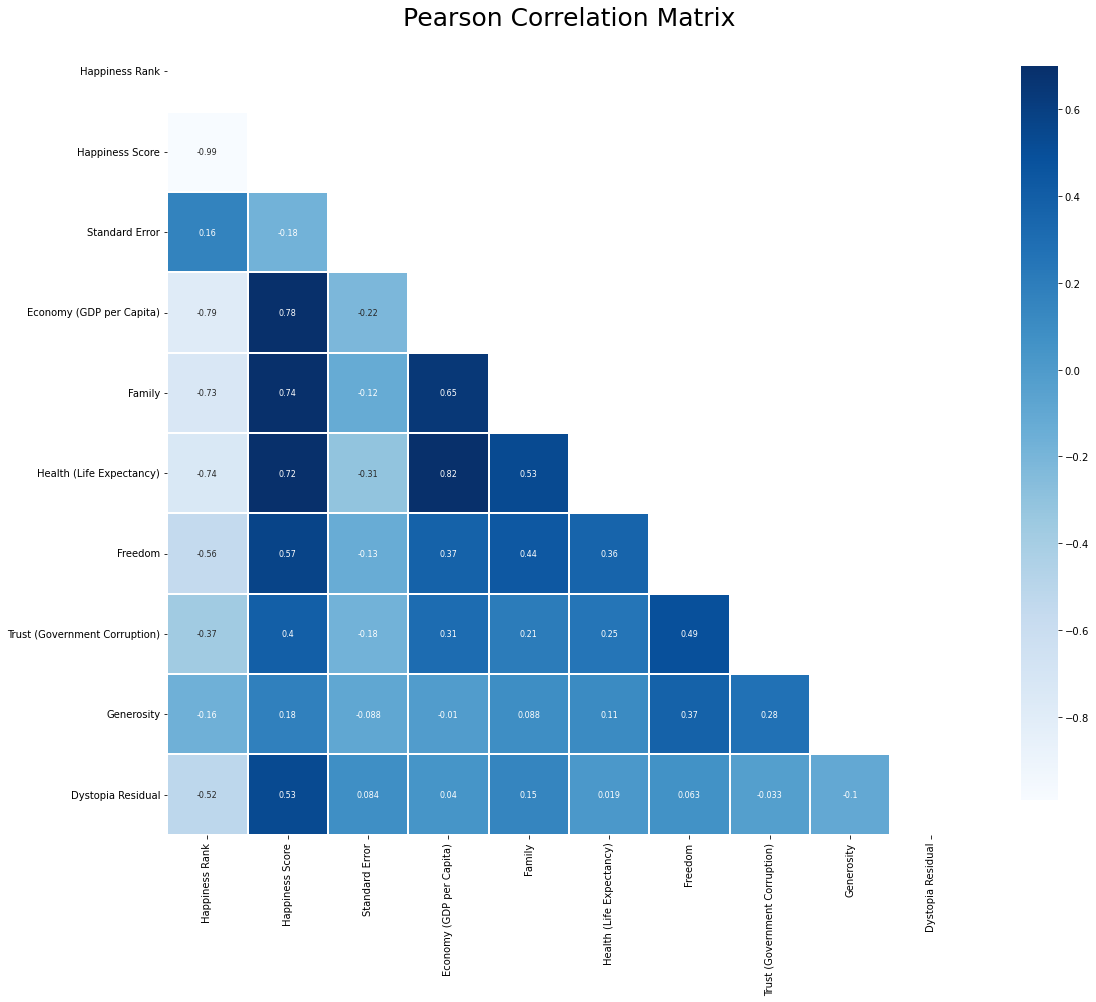

In [6]:
mask = np.zeros_like(data.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(data.corr(),
                        linewidths=0.25,vmax=0.7,square=True,cmap="Blues", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})

### 
* Economy, Health, Family having are correlated with Happiness Score

In [7]:
data.drop(columns = ['Standard Error'], inplace = True)

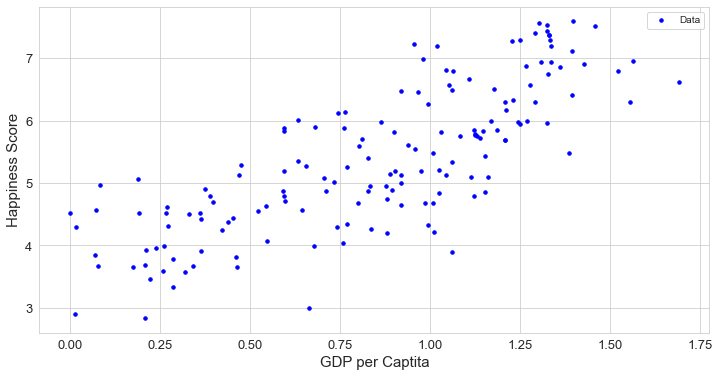

In [8]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(data['Economy (GDP per Capita)'], data['Happiness Score'],color='blue',label="Data", s = 12)
#plt.plot([lineStart, lineEnd], [lineStart, lineEnd], color = 'r')

plt.xlabel("GDP per Captita", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

#plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['top'].set_visible(False)

#### 
As we can see the higher the per capita income, the more happinees score is

It is very common to use a country’s GDP or GDP per capita to evaluate a country’s development and productivity, as well as the well-beings of people.

In [9]:
#!pip install chart_studio

In [10]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Univariate Analysis

In [11]:
data[data['Country']=='India']                              # India is in 116th pos out of 158

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
116,India,Southern Asia,117,4.565,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


In [12]:
data.duplicated().any()       #Checking for duplicate

False

In [13]:
data['Region'].value_counts()                  #Count of countries region wise

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

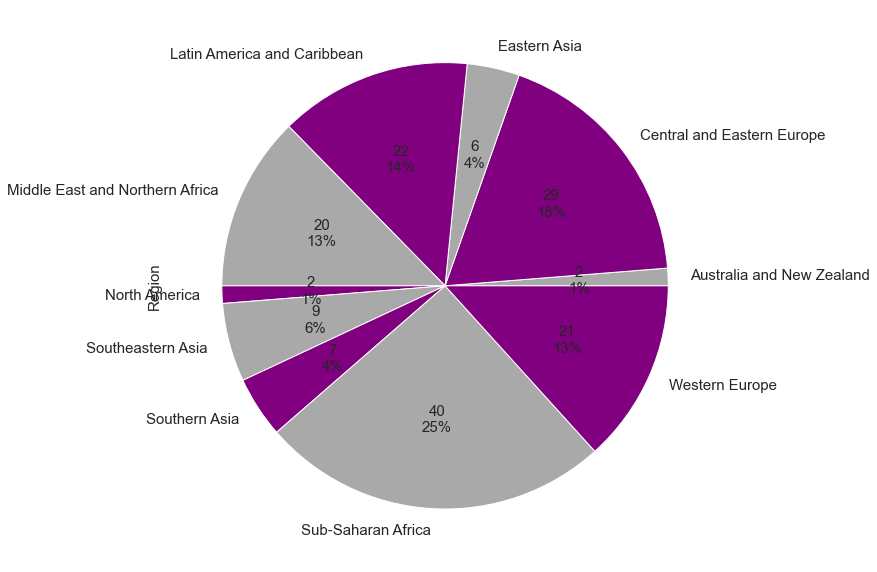

In [14]:
def label_function(val):                                                      #Sharing% Number of countries in differet region
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
plt.subplots(ncols=1, figsize=(10, 15))
data.groupby('Region').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},
                                 colors=['darkgrey', 'purple']).set_ylabel('Region', size=15)
plt.show

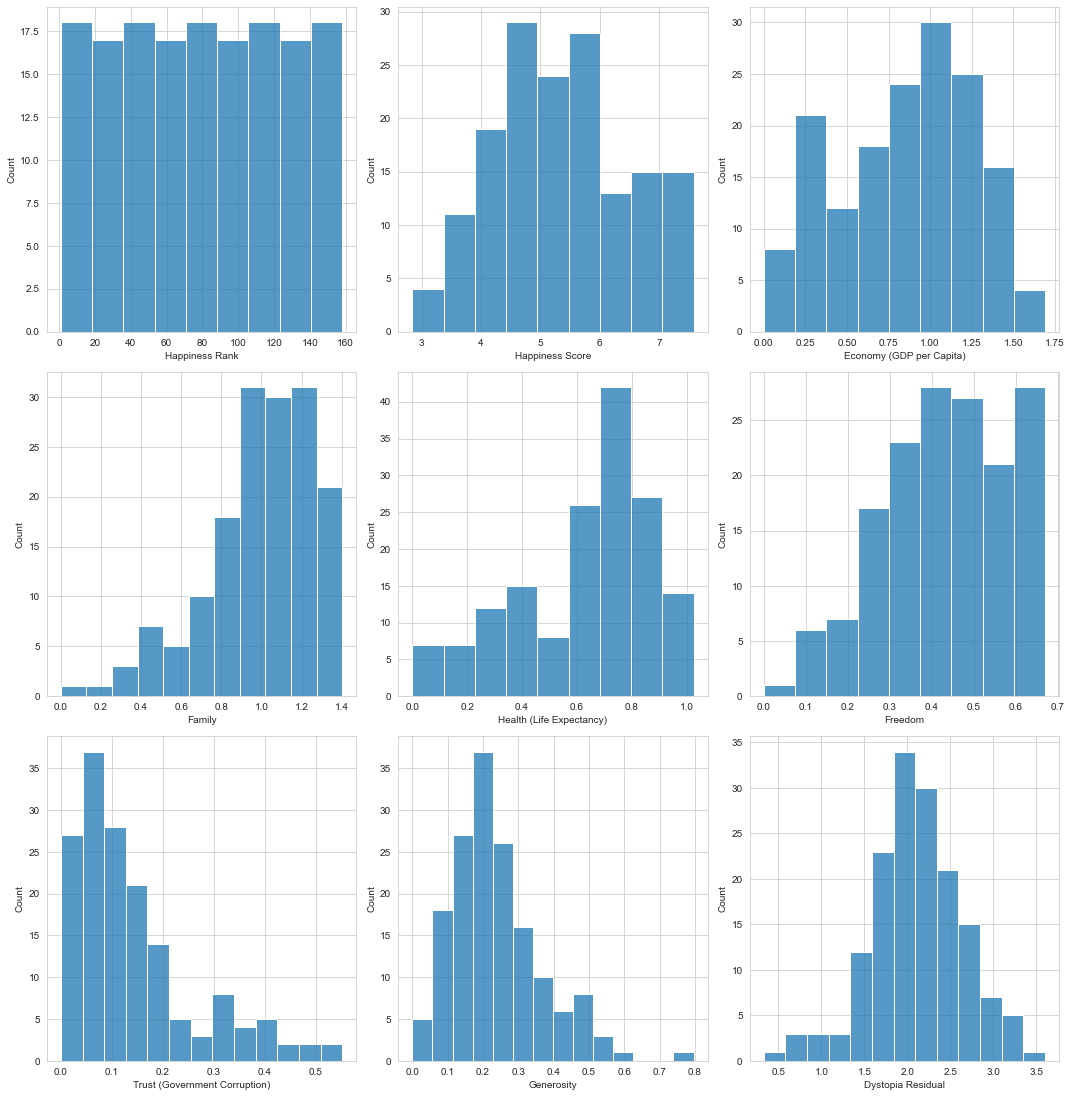

In [15]:
cols = 3                                                         #we can see the frequency ditribution here
rows = 4
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax)
    
fig.tight_layout()  
plt.show()


In [16]:
data[data['Happiness Rank'] <= 10].loc[:,'Country':'Happiness Rank']

,Country,Region,Happiness Rank
0,Switzerland,Western Europe,1
1,Iceland,Western Europe,2
2,Denmark,Western Europe,3
3,Norway,Western Europe,4
4,Canada,North America,5
5,Finland,Western Europe,6
6,Netherlands,Western Europe,7
7,Sweden,Western Europe,8
8,New Zealand,Australia and New Zealand,9
9,Australia,Australia and New Zealand,10


#### Top 10 Coutries w.r.t happiness

In [17]:
data[['Country', 'Happiness Rank']].sort_values(by = 'Happiness Rank',
                                                ascending = True).head(10)

,Country,Happiness Rank
0,Switzerland,1
1,Iceland,2
2,Denmark,3
3,Norway,4
4,Canada,5
5,Finland,6
6,Netherlands,7
7,Sweden,8
8,New Zealand,9
9,Australia,10


#### Top 10 Countries W.R.T GDP

In [18]:
data[['Country', 'Economy (GDP per Capita)']].sort_values(by = 'Economy (GDP per Capita)',
                                                ascending = False).head(10)

,Country,Economy (GDP per Capita)
27,Qatar,1.69042
16,Luxembourg,1.56391
38,Kuwait,1.55422
23,Singapore,1.52186
3,Norway,1.45900
19,United Arab Emirates,1.42727
0,Switzerland,1.39651
34,Saudi Arabia,1.39541
14,United States,1.39451
71,Hong Kong,1.38604


In [19]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Top 10 Countries W.R.T Family

In [20]:
data[['Country', 'Family']].sort_values(by = 'Family',
                                                ascending = False).head(10)

,Country,Family
1,Iceland,1.40223
17,Ireland,1.36948
2,Denmark,1.36058
0,Switzerland,1.34951
43,Uzbekistan,1.34043
3,Norway,1.33095
4,Canada,1.32261
8,New Zealand,1.31967
5,Finland,1.31826
35,Spain,1.31379


#### Top 10 Countries W.R.T Life Expectancy

In [21]:
data[['Country', 'Health (Life Expectancy)']].sort_values(by = 'Health (Life Expectancy)',
                                                ascending = False).head(10)

,Country,Health (Life Expectancy)
23,Singapore,1.02525
71,Hong Kong,1.01328
45,Japan,0.99111
46,South Korea,0.96538
35,Spain,0.95562
49,Italy,0.95446
1,Iceland,0.94784
28,France,0.94579
0,Switzerland,0.94143
9,Australia,0.93156


#### Top 10 Countries W.R.T Freedom

In [22]:
data[['Country', 'Freedom']].sort_values(by = 'Freedom',
                                                ascending = False).head(10)

,Country,Freedom
3,Norway,0.66973
0,Switzerland,0.66557
144,Cambodia,0.66246
7,Sweden,0.65980
43,Uzbekistan,0.65821
9,Australia,0.65124
2,Denmark,0.64938
5,Finland,0.64169
19,United Arab Emirates,0.64157
27,Qatar,0.64040


#### Top 10 Countries W.R.T Trust(Govt. Corruption

In [23]:
data[['Country', 'Trust (Government Corruption)']].sort_values(by = 'Trust (Government Corruption)',
                                                ascending = False).head(10)

,Country,Trust (Government Corruption)
153,Rwanda,0.55191
27,Qatar,0.52208
23,Singapore,0.49210
2,Denmark,0.48357
7,Sweden,0.43844
8,New Zealand,0.42922
0,Switzerland,0.41978
5,Finland,0.41372
90,Somaliland region,0.39928
19,United Arab Emirates,0.38583


#### Top 10 Countries W.R.T Generocity

In [24]:
data[['Country', 'Generosity']].sort_values(by = 'Generosity',
                                                ascending = False).head(10)

,Country,Generosity
128,Myanmar,0.79588
33,Thailand,0.57630
20,United Kingdom,0.51912
36,Malta,0.51752
73,Indonesia,0.51535
90,Somaliland region,0.50318
78,Bhutan,0.47998
6,Netherlands,0.47610
8,New Zealand,0.47501
155,Syria,0.47179


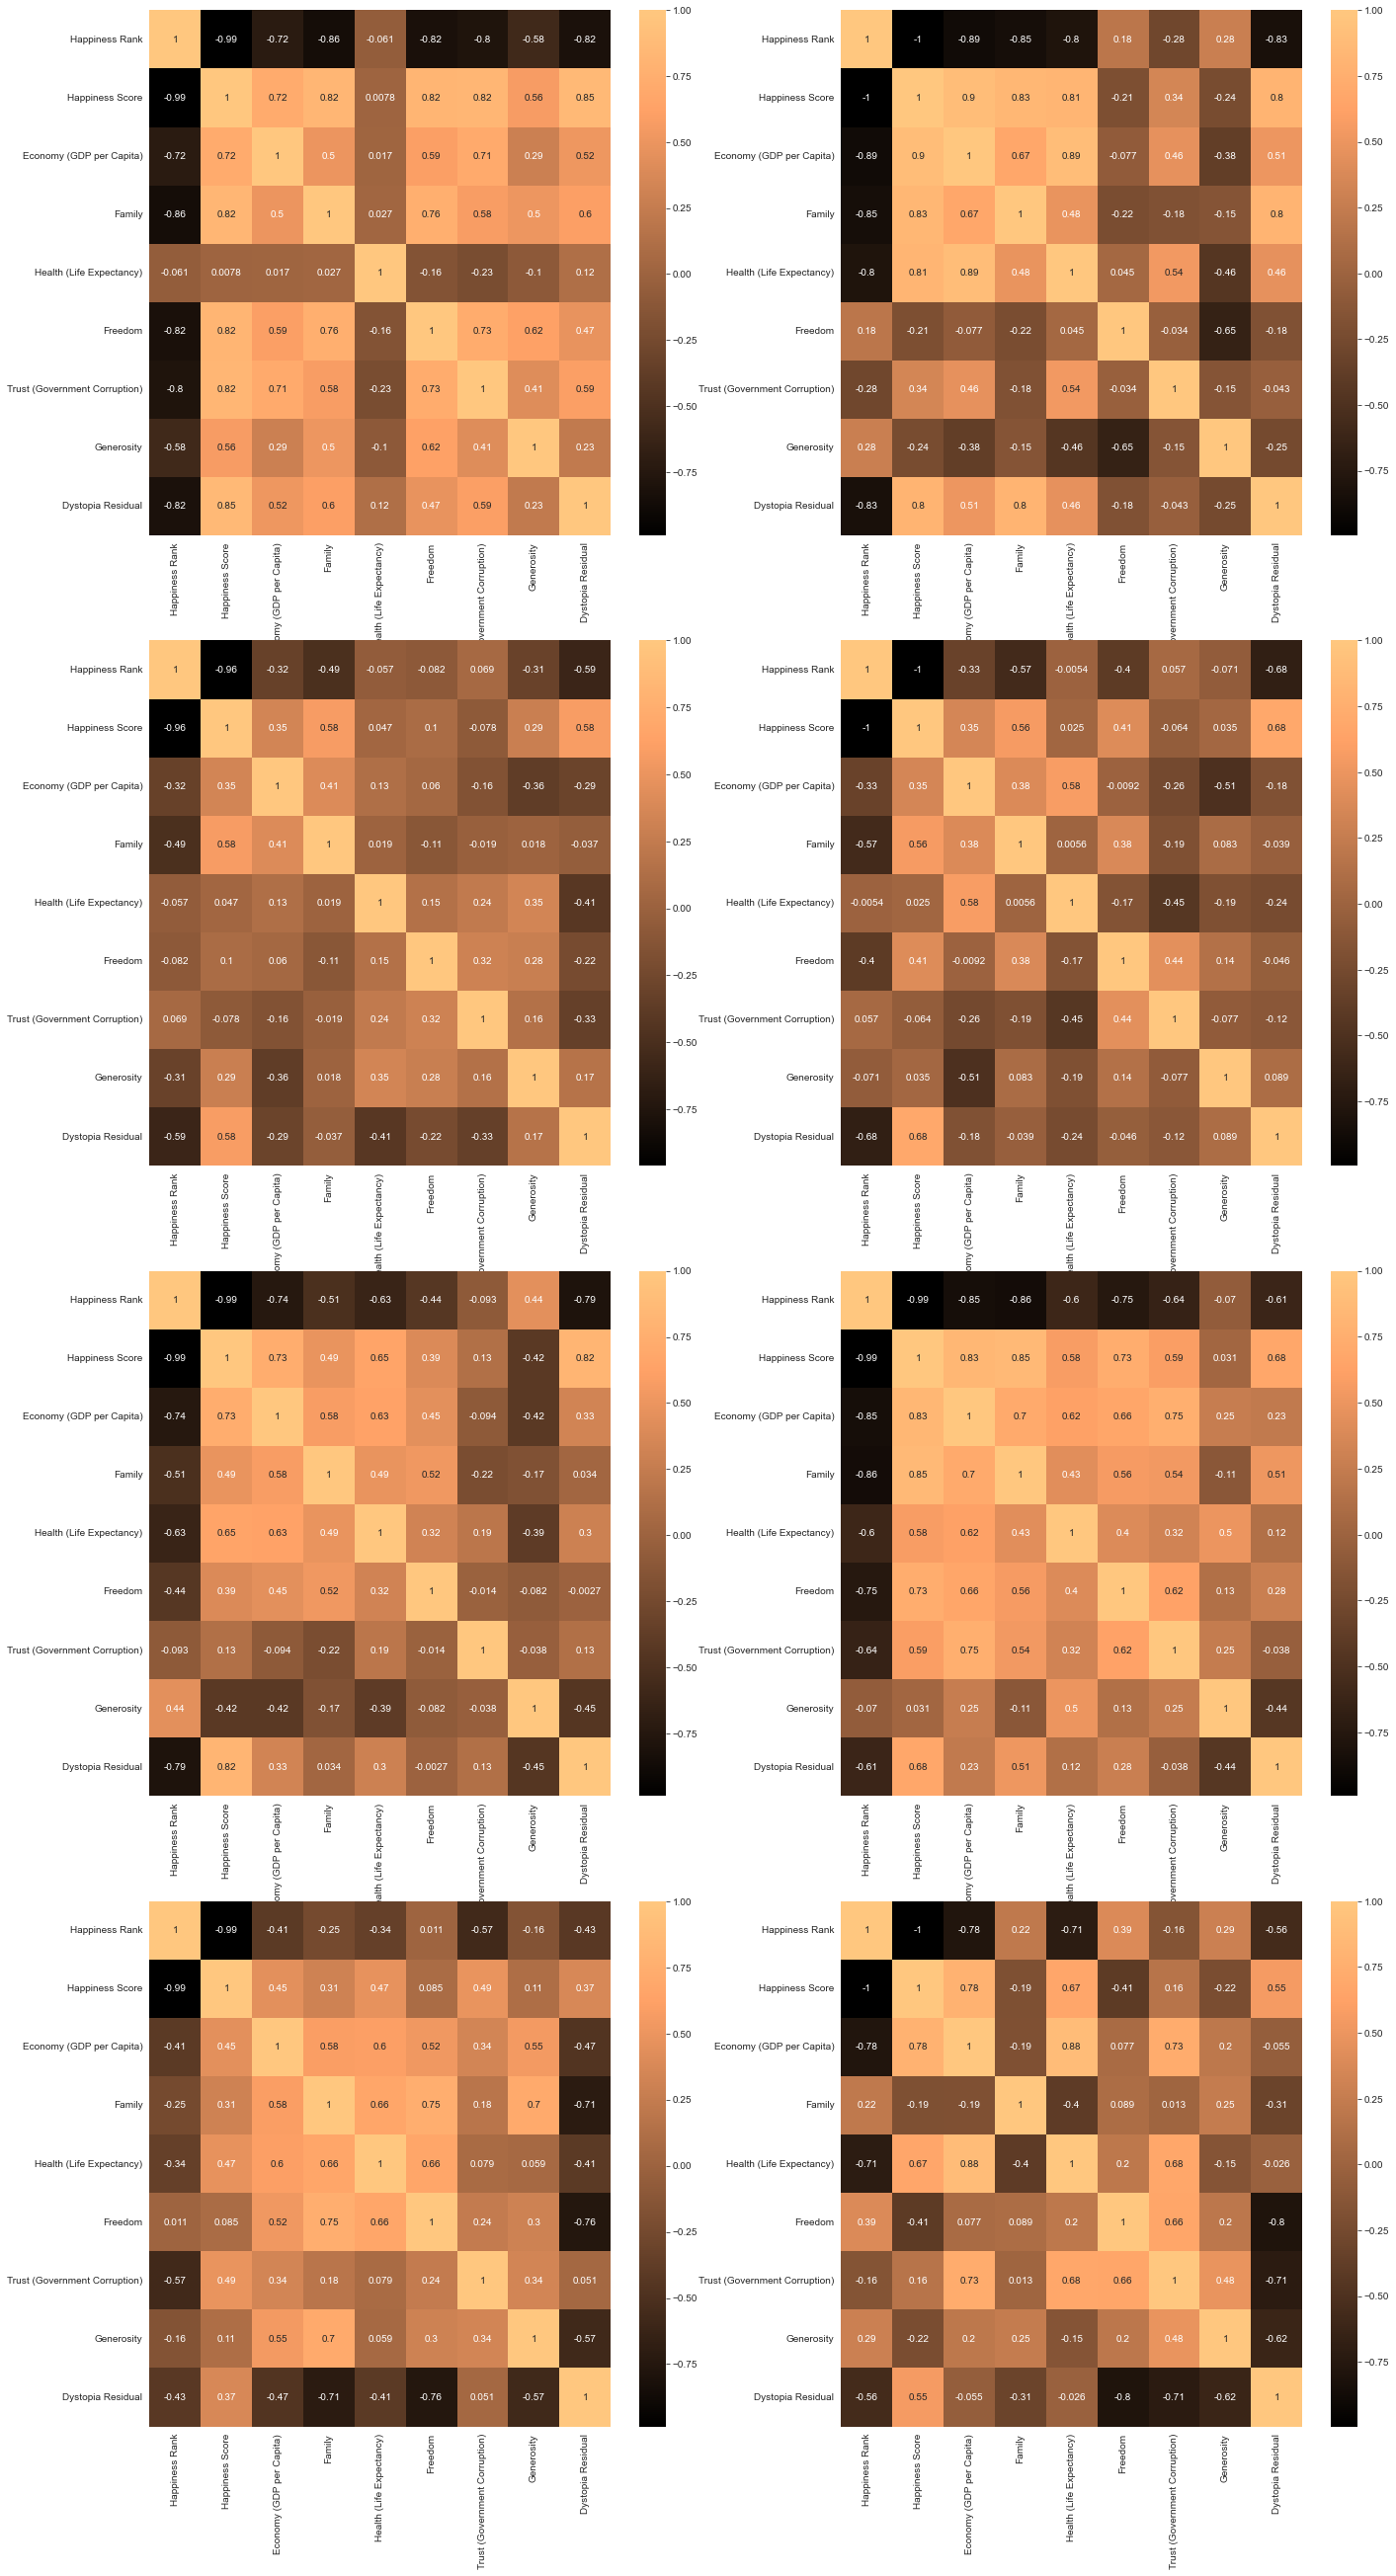

In [53]:
fig = plt.figure(figsize = (23,45))# width x height
ax1 = fig.add_subplot(4, 2, 1) # row, column, position
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3) # row, column, position
ax4 = fig.add_subplot(4, 2, 4)
ax5= fig.add_subplot(4, 2, 5)# row, column, position
ax6= fig.add_subplot(4, 2, 6)
ax7= fig.add_subplot(4, 2, 7) # row, column, position
ax8= fig.add_subplot(4, 2, 8)


#plt.rcParams['figure.figsize'] = (10, 8)
d = data.loc[lambda data: data['Region'] == 'Western Europe']
d1 = data.loc[lambda data: data['Region'] == 'Southeastern Asia']
d2 = data.loc[lambda data: data['Region'] == 'Sub-Saharan Africa']
d3 = data.loc[lambda data: data['Region'] == 'Central and Eastern Europe']
d4= data.loc[lambda data: data['Region'] == 'Latin America and Caribbean']
d5= data.loc[lambda data: data['Region'] == 'Middle East and Northern Africa']
d6 = data.loc[lambda data: data['Region'] == 'Southern Asia']
d7 = data.loc[lambda data: data['Region'] == 'Eastern Asia']


sns.heatmap(d.corr(), cmap = 'copper', annot = True, ax = ax1)
sns.heatmap(d1.corr(), cmap = 'copper', annot = True, ax = ax2)
sns.heatmap(d2.corr(), cmap = 'copper', annot = True, ax = ax3)
sns.heatmap(d3.corr(), cmap = 'copper', annot = True, ax = ax4)
sns.heatmap(d4.corr(), cmap = 'copper', annot = True, ax = ax5)
sns.heatmap(d5.corr(), cmap = 'copper', annot = True, ax = ax6)
sns.heatmap(d6.corr(), cmap = 'copper', annot = True, ax = ax7)
sns.heatmap(d7.corr(), cmap = 'copper', annot = True, ax = ax8)


plt.show()

### 
1. In **Western Europe**, Happiness more depend on Trust, Freedom, Family while very less depend on Health life.
2. In **Southeastern Asia**, Happiness more depend on GDP and then Family, Health while very less depend on Trust and negetively less depend on Freedom.
3. In **Sub-Saharan Africa**, little more depends on Family,while very less depend on others.
4. In **Central and Eastern Europe**, little more depends on Family,while very less depend on others.
5. In **Latin America and Caribbean**, more depends on Economy then depends on health,less depends Family and Freedom while very less depend on others.
6. In **Southern Asia**, Economy, Family and Freedom matters more than other. 
7. In **Middle East and Northern Africa**, Happiness not very much depends on any of the variable. 
8. In **Eastern Asia**, GDP and Health to contribute more in happiness.

In [41]:
data['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [57]:
#!pip install bubbly

In [60]:
from bubbly.bubbly import bubbleplot
import plotly.offline as py

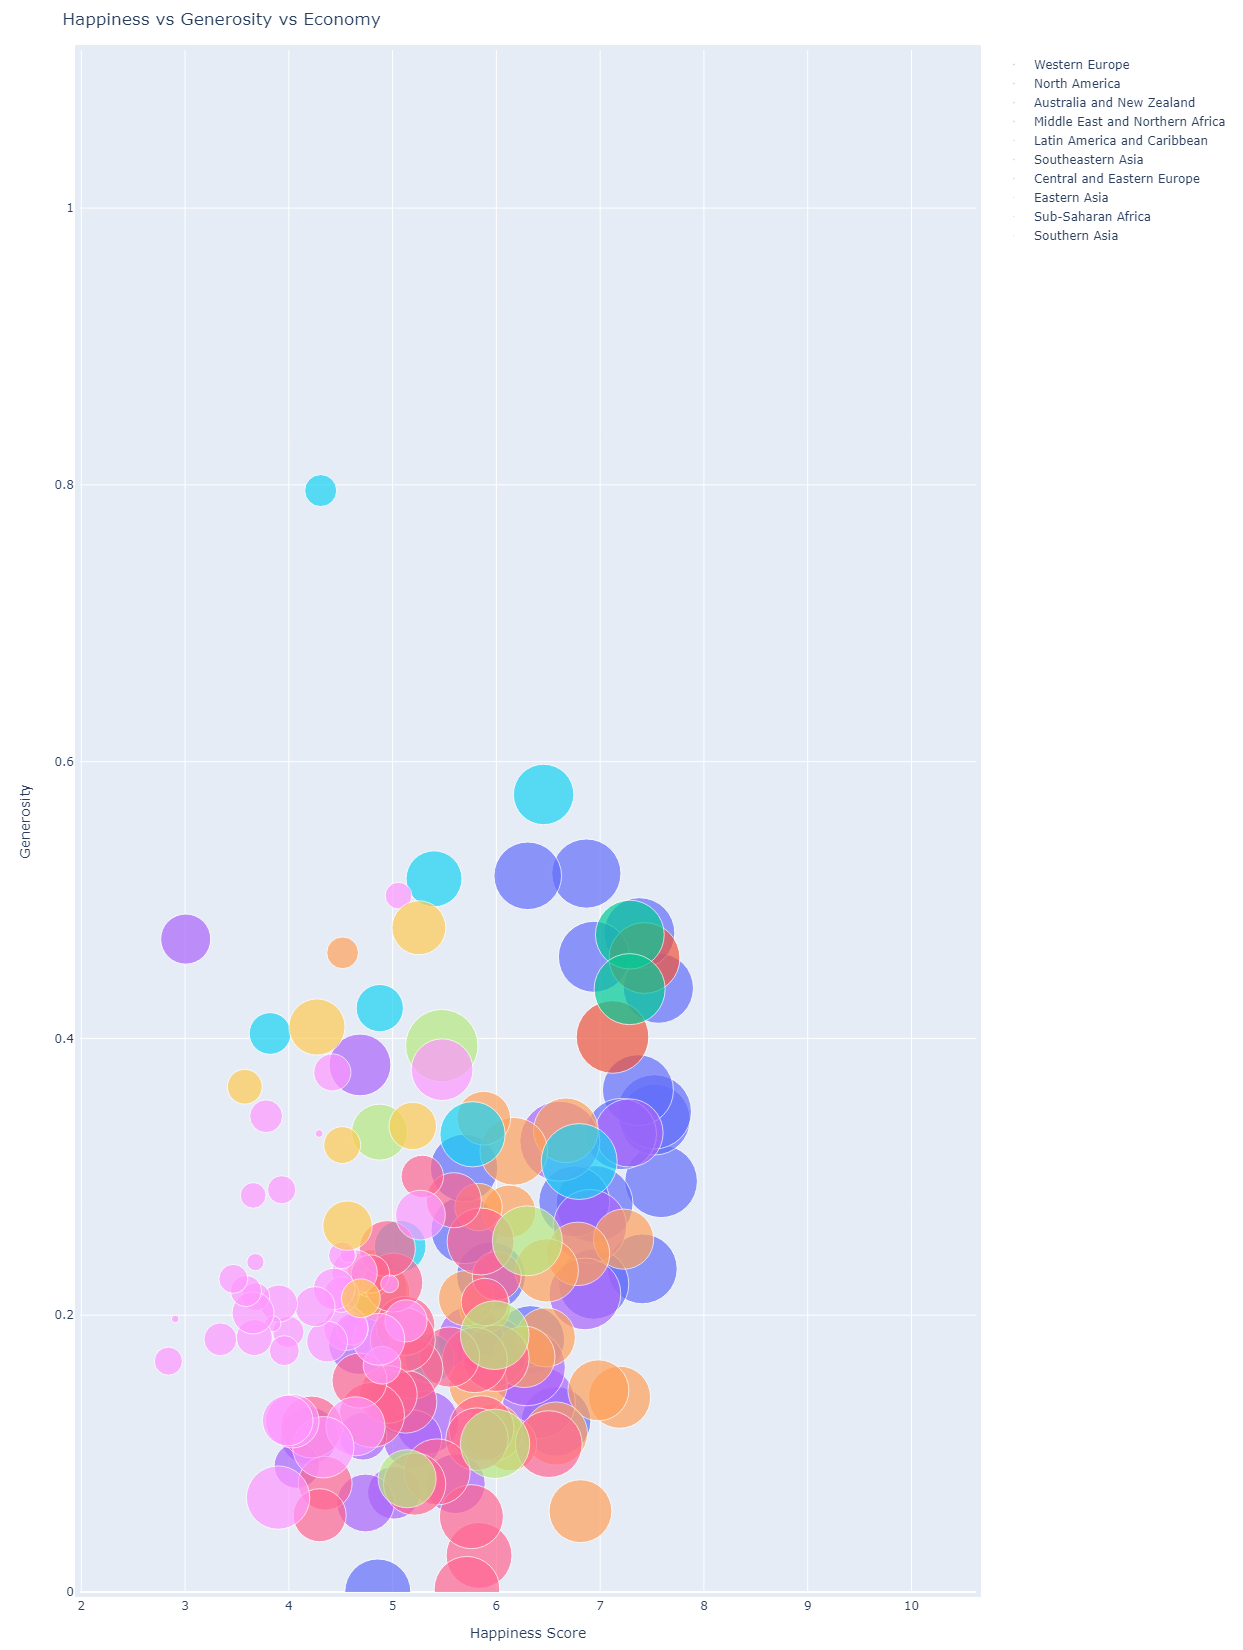

In [74]:
figure = bubbleplot(dataset = data, x_column = 'Happiness Score', y_column = 'Generosity', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Generosity", title = 'Happiness vs Generosity vs Economy',
    x_logscale = False, scale_bubble = 1, height = 1650)

py.iplot(figure, config={'scrollzoom': True})

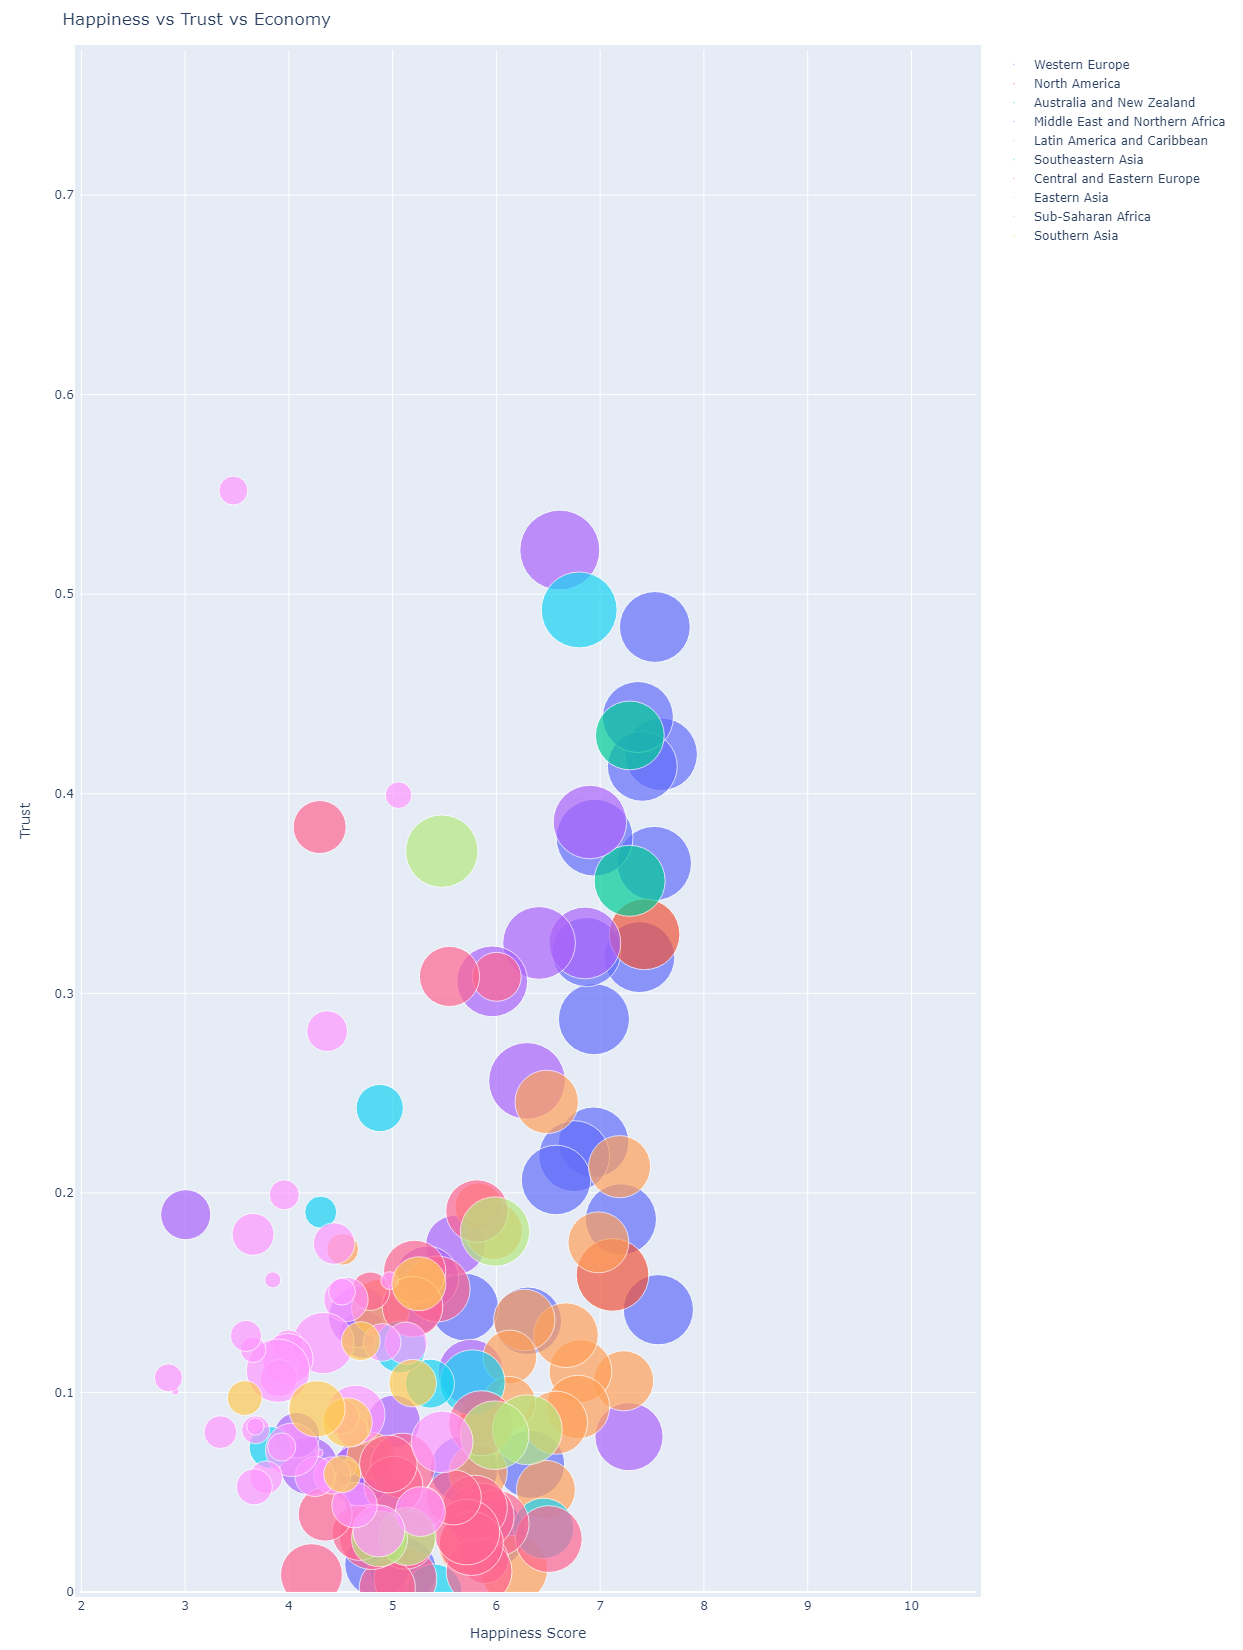

In [73]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'Happiness Score', y_column = 'Trust (Government Corruption)', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Trust", title = 'Happiness vs Trust vs Economy',
    x_logscale = False, scale_bubble = 1, height = 1650)

py.iplot(figure, config={'scrollzoom': True})

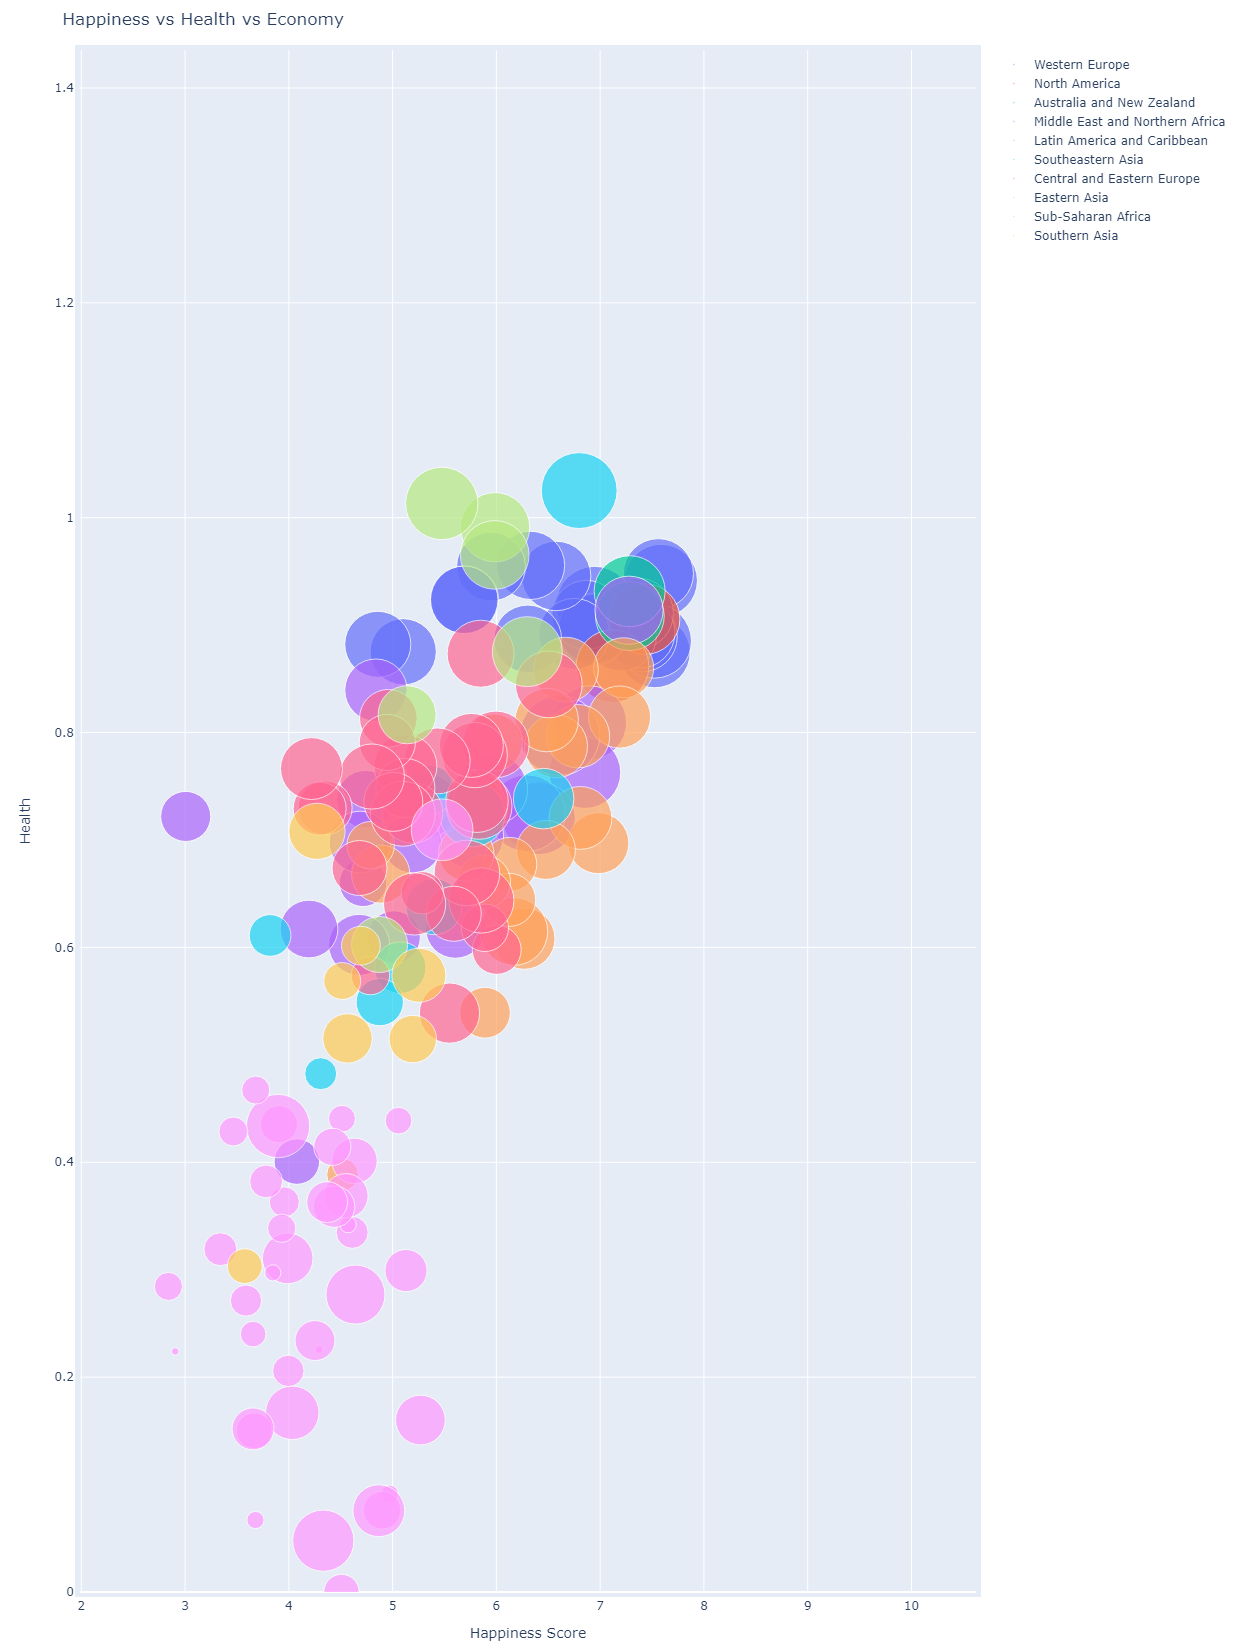

In [72]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'Happiness Score', y_column = 'Health (Life Expectancy)', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Health", title = 'Happiness vs Health vs Economy',
    x_logscale = False, scale_bubble = 1, height = 1650)

py.iplot(figure, config={'scrollzoom': True})


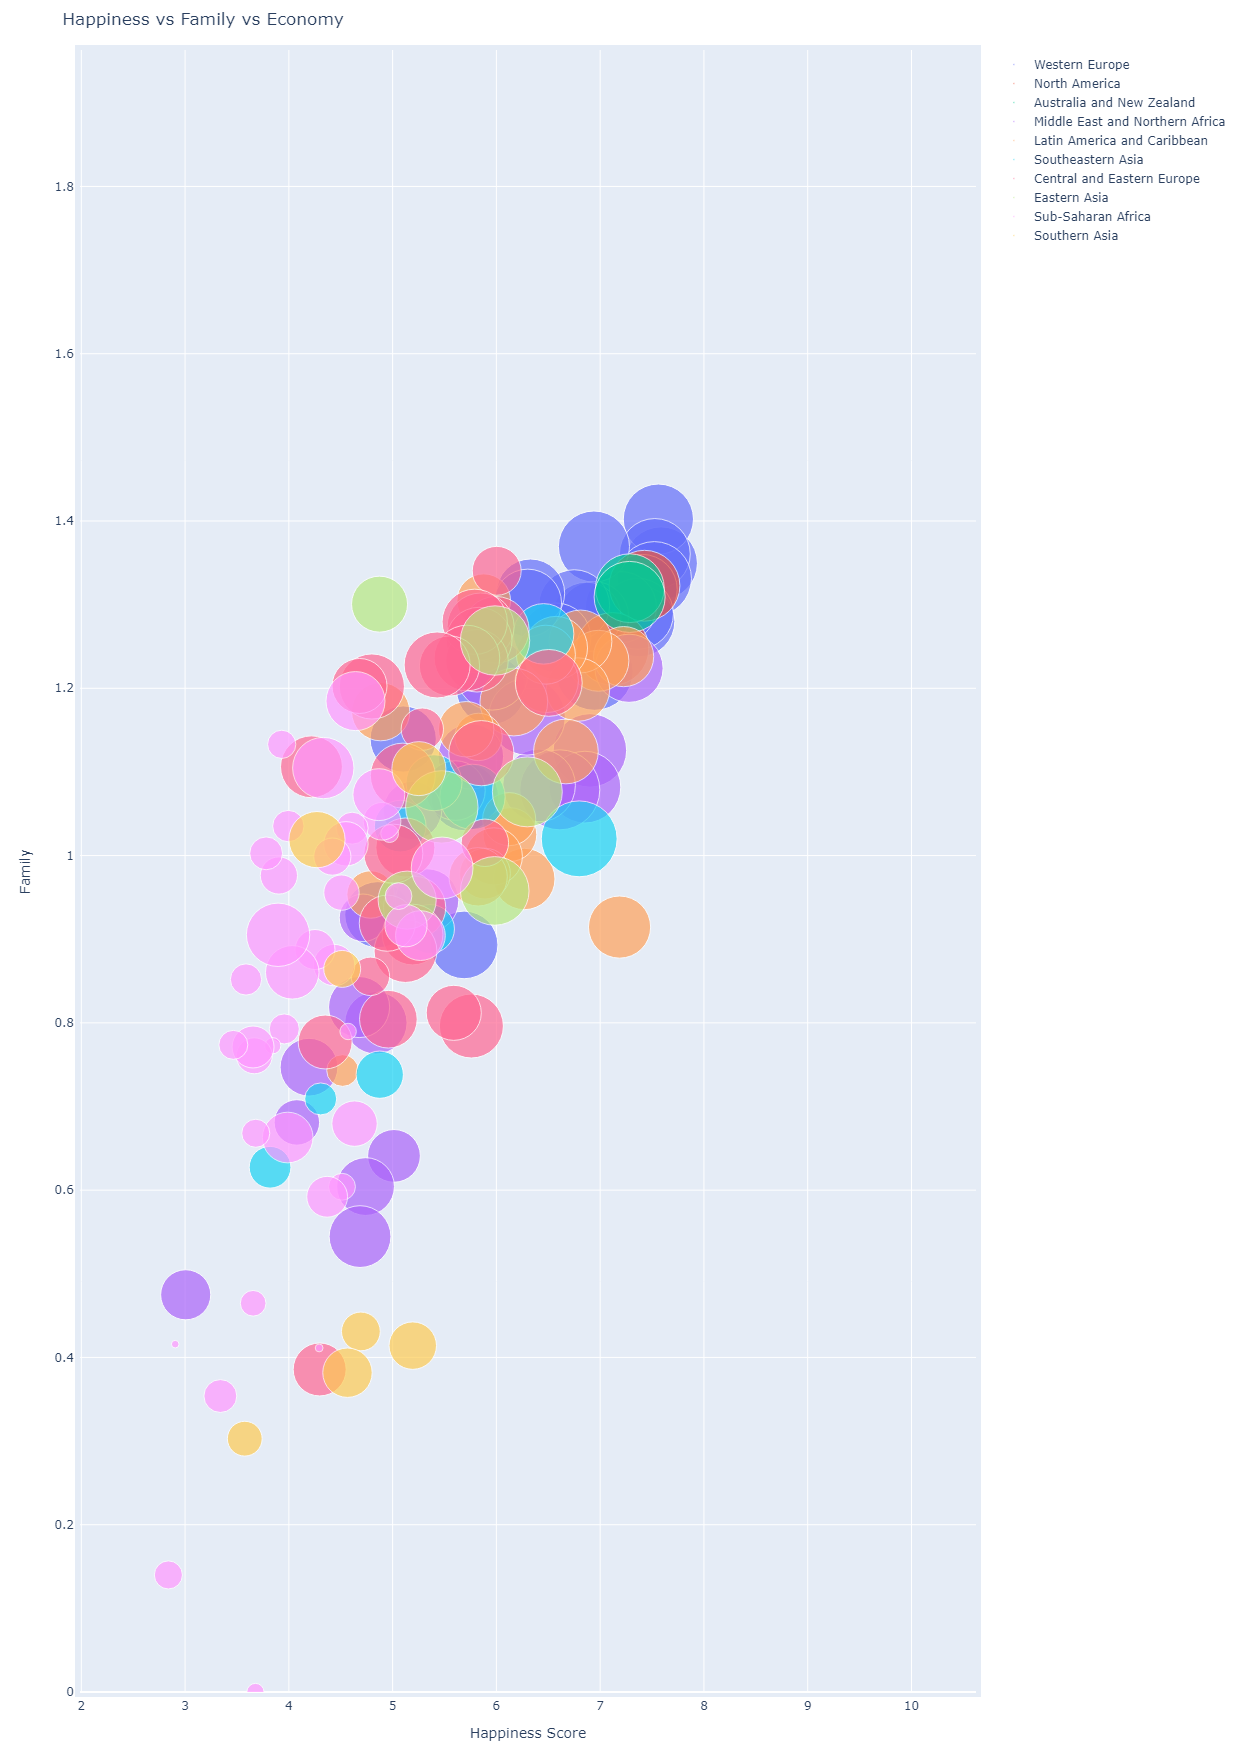

In [71]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'Happiness Score', y_column = 'Family', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Family", title = 'Happiness vs Family vs Economy',
    x_logscale = False, scale_bubble = 1, height = 1750)

py.iplot(figure, config={'scrollzoom': True})

<AxesSubplot:xlabel='Happiness Rank', ylabel='Country'>

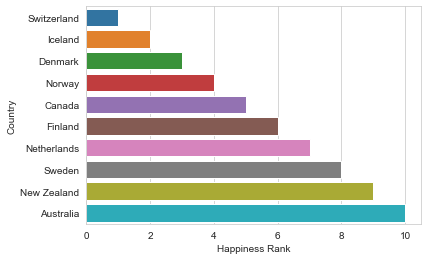

In [65]:
sns.barplot(data['Happiness Rank'][:10], data['Country'][:10])